# **Langchain**
LangChain is a framework designed to simplify the creation of applications using large language models. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis  

### **Different Usecases of langchain**

1. Personal Assistance 
2. Question Answering over Docs 
3. Chatbots 
4. Querying Tabular data 
5. Interacting with API’s 
5. Extraction 
6. Evaluation 
7. Summarization 
(Link: https://docs.langchain.com/docs/category/use-cases ) 

## **Components of Langchain**

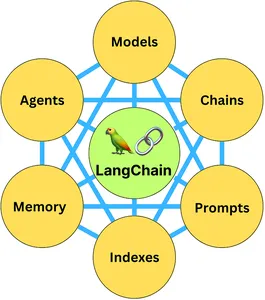


#### 1. Model I/O: Interface with language models. It consists of Prompts, Models, and Output parsers 
#### 2. Data connection: Interface with application-specific data sources with data transformers, text splitters, vector stores, and retrievers 
#### 3. Chains: Construct a sequence of calls with other components of the AI application. some examples of chains are sequential chains, summarization chain, and Retrieval Q&A Chains 
#### 4. Agents: LangChain provides Agents which allow applications to utilize a dynamic chain of calls to various tools, including LLMs, based on user input. 
#### 5. Memory: Persist application state between runs of a chain 
#### 6. Callbacks: Log and stream steps of sequential chains in order to run the chains efficiently and monitor the resources consumption 

# **Models I/O - The interface to the AI brains**


In [3]:
from dotenv import load_dotenv
import os

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

## Language Model


In [22]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-ada-001", openai_api_key=openai_api_key)
llm("What day comes after Friday?")


'\n\nSaturday'

## Chat Model

In [25]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage


chat = ChatOpenAI(temperature=1, openai_api_key=openai_api_key)

In [24]:
chat(
    [
        SystemMessage(content="You are an unhelpful AI bot that makes a joke at whatever the user says"),
        HumanMessage(content="I would like to go to New York, how should I do this?")
    ]
)

AIMessage(content="Why don't you just teleport there? I'm sure you have that option, right?", additional_kwargs={}, example=False)

In [27]:
'''You can build a ChatPromptTemplate from one or more MessagePromptTemplates.
 You can use ChatPromptTemplate's format_prompt -- this returns a PromptValue, 
 which you can convert to a string or Message object, depending on whether you want to
   use the formatted value as input to an llm or chat model.'''

"You can build a ChatPromptTemplate from one or more MessagePromptTemplates.\n You can use ChatPromptTemplate's format_prompt -- this returns a PromptValue, \n which you can convert to a string or Message object, depending on whether you want to\n   use the formatted value as input to an llm or chat model."

### Also herr is an example of how we can use prompts

In [28]:
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

template = (
    "You are a helpful assistant that translates {input_language} to {output_language}."
)
system_message_prompt = SystemMessagePromptTemplate.from_template(template)


human_template = "{text}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

In [ ]:
chat_prompt = ChatPromptTemplate.from_messages(
    [system_message_prompt, human_message_prompt]
)

# get a chat completion from the formatted messages
chat(
    chat_prompt.format_prompt(
        input_language="English", output_language="French", text="I love programming."
    ).to_messages()
)




## Text Embedding Model


In [29]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [30]:
text = "Hi! It's time for the beach" 

In [31]:
text_embedding = embeddings.embed_query(text)
print (f"Your embedding is length {len(text_embedding)}")
print (f"Here's a sample: {text_embedding[:5]}...")

Your embedding is length 1536
Here's a sample: [-0.00011466221621958539, -0.0031506523955613375, -0.0007831145194359124, -0.019504327327013016, -0.015125557780265808]...


# Prompt

In [32]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

# I like to use three double quotation marks for my prompts because it's easier to read
prompt = """
Today is Monday, tomorrow is Wednesday.

What is wrong with that statement?
"""

llm(prompt)

'\nThe statement is incorrect because tomorrow is Tuesday.'

## Prompt Template

#Think of it as an f-string in python but for prompts



In [33]:
from langchain.llms import OpenAI
from langchain import PromptTemplate

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

# Notice "location" below, that is a placeholder for another value later
template = """
I really want to travel to {location}. What should I do there?

Respond in one short sentence
"""

prompt = PromptTemplate(
    input_variables=["location"],
    template=template,
)

final_prompt = prompt.format(location='Rome')

print (f"Final Prompt: {final_prompt}")
print ("-----------")
print (f"LLM Output: {llm(final_prompt)}")

Final Prompt: 
I really want to travel to Rome. What should I do there?

Respond in one short sentence

-----------
LLM Output: Visit the Colosseum, the Pantheon, the Trevi Fountain, and the Vatican!


## Example Selectors

''' 
An easy way to select from a series of examples that allow you to dynamic place in-context information into your prompt. Often used when your task is nuanced or you have a large list of examples.
'''

In [3]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Example Input: {input}\nExample Output: {output}",
)

# Examples of locations that nouns are found
examples = [
    {"input": "pirate", "output": "ship"},
    {"input": "pilot", "output": "plane"},
    {"input": "driver", "output": "car"},
    {"input": "tree", "output": "ground"},
    {"input": "bird", "output": "nest"},
]

In [7]:
# SemanticSimilarityExampleSelector will select examples that are similar to your input by semantic meaning

example_selector = SemanticSimilarityExampleSelector.from_examples(
    # This is the list of examples available to select from.
    examples, 
    
    # This is the embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(openai_api_key=openai_api_key), 
    
    # This is the VectorStore class that is used to store the embeddings and do a similarity search over.
    FAISS, 
    
    # This is the number of examples to produce.
    k=7
)


In [11]:
similar_prompt = FewShotPromptTemplate(     
    # The object that will help select examples
    example_selector=example_selector,
    
    # Your prompt
    example_prompt=example_prompt,
    
    # Customizations that will be added to the top and bottom of your prompt
    prefix="Give the location an item is usually found in",
    suffix="Input: {noun}\nOutput:",
    
    # What inputs your prompt will receive
    input_variables=["noun"],
)

In [9]:
# Select a noun!
my_noun = "student"
print(similar_prompt.format(noun=my_noun))


Give the location an item is usually found in

Example Input: driver
Example Output: car

Example Input: pilot
Example Output: plane

Example Input: bird
Example Output: nest

Example Input: tree
Example Output: ground

Example Input: pirate
Example Output: ship

Input: student
Output:


In [10]:
llm(similar_prompt.format(noun=my_noun))

' classroom'

## Output Parsers
A helpful way to format the output of a model. Usually used for structured output.

Two big concepts:

1. Format Instructions - A autogenerated prompt that tells the LLM how to format it's response based off your desired result

2. Parser - A method which will extract your model's text output into a desired structure (usually json)(as the default output of the model is string)

In [13]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI

In [17]:
llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

In [18]:
# How you would like your response structured. This is basically a fancy prompt template
response_schemas = [
    ResponseSchema(name="bad_string", description="This a poorly formatted user input string"),
    ResponseSchema(name="good_string", description="This is your response, a reformatted response")
]

# How you would like to parse your output
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [19]:
# See the prompt template you created for formatting
format_instructions = output_parser.get_format_instructions()
print (format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```


In [20]:
template = """
You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

{format_instructions}

% USER INPUT:
{user_input}

YOUR RESPONSE:
"""

prompt = PromptTemplate(
    input_variables=["user_input"],
    partial_variables={"format_instructions": format_instructions},
    template=template
)

promptValue = prompt.format(user_input="welcom to califonya!")

print(promptValue)


You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```

% USER INPUT:
welcom to califonya!

YOUR RESPONSE:



In [21]:
llm_output = llm(promptValue)
llm_output

'```json\n{\n\t"bad_string": "welcom to califonya!",\n\t"good_string": "Welcome to California!"\n}\n```'

In [22]:
output_parser.parse(llm_output)


{'bad_string': 'welcom to califonya!', 'good_string': 'Welcome to California!'}

# Indexes - Structuring documents to LLMs can work with them
### Document Loaders
Easy ways to import data from other sources. Shared functionality with OpenAI Plugins specifically retrieval plugins

See a big list of document loaders here. A bunch more on Llama Index as well.
other include BSHTMLLoader, PyPDF loader etc

In [11]:
from langchain.document_loaders import HNLoader

In [12]:
loader = HNLoader("https://news.ycombinator.com/item?id=34422627")

In [13]:
data = loader.load()

In [14]:
print (f"Found {len(data)} comments")
print (f"Here's a sample:\n\n{''.join([x.page_content[:150] for x in data[:2]])}")

Found 76 comments
Here's a sample:

Ozzie_osman 5 months ago  
             | next [–] 

LangChain is awesome. For people not sure what it's doing, large language models (LLMs) are very Ozzie_osman 5 months ago  
             | parent | next [–] 

Also, another library to check out is GPT Index (https://github.com/jerryjliu/gpt_index)


## Text Splitters
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with different ones to see which is best for you.

In [15]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [17]:
# This is a long document we can split up.
with open('data/Metaverse.txt') as f:
    pg_work = f.read()
    
print (f"You have {len([pg_work])} document")

You have 1 document


In [18]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 150,
    chunk_overlap  = 20,
)

texts = text_splitter.create_documents([pg_work])

In [19]:
print (f"You have {len(texts)} documents")

You have 10 documents


In [20]:
print ("Preview:")
print (texts[0].page_content, "\n")
print (texts[1].page_content)

Preview:
Technology is changing rapidly. Some of the latest buzz is around the metaverse. While this concept of the metaverse isn’t new, Facebook’s rebrand to 

rebrand to Meta has sparked interest and discussion about the virtual world. Along with Meta, several companies are at the forefront of metaverse


## Retrievers
Easy way to combine documents with language models.

There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever

When we create embeddings, this retriever goes to the documents and search for the best matching documents and returns it.


In [22]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/Metaverse.txt')
documents = loader.load()

In [25]:
# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

# Embedd your texts
db = FAISS.from_documents(texts, embeddings)

In [26]:
# Init your retriever. Asking for just 1 document back
retriever = db.as_retriever()
retriever

VectorStoreRetriever(tags=None, metadata=None, vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x174103a90>, search_type='similarity', search_kwargs={})

In [30]:
docs = retriever.get_relevant_documents("Name the technologies the author is text is talking about? ")
print("\n\n".join([x.page_content[:200] for x in docs[:2]]))


Technology is changing rapidly. Some of the latest buzz is around the metaverse. While this concept of the metaverse isn’t new, Facebook’s rebrand to Meta has sparked interest and discussion about the

While many ways to enter the metaverse already exist through a series of different worlds that all require their own entry, the vision is that it will all come together in the future to form one cohes


In [31]:
docs

[Document(page_content='Technology is changing rapidly. Some of the latest buzz is around the metaverse. While this concept of the metaverse isn’t new, Facebook’s rebrand to Meta has sparked interest and discussion about the virtual world. Along with Meta, several companies are at the forefront of metaverse technology and making big developments in this interactive space. Learn more about the top metaverse companies and jobs you can explore now and in the future in this industry. \n\nWhat is the metaverse?\nThe metaverse is an interactive virtual world accessed through virtual reality (VR) and augmented reality (AR). Once in the metaverse, users interact through avatars, which are digital representations of people who can socialize, engage in entertainment, and in some cases, live a life within the virtual world.', metadata={'source': 'data/Metaverse.txt'}),
 Document(page_content='While many ways to enter the metaverse already exist through a series of different worlds that all requir

## VectorStores
Databases to store vectors. Most popular ones are Pinecone & Weaviate. More examples on OpenAIs retriever documentation. Chroma & FAISS are easy to work with locally.

Conceptually, think of them as tables w/ a column for embeddings (vectors) and a column for metadata.

Example

                      *Embedding*	             *Metadata*
[-0.00015641732898075134, -0.003165106289088726, ...]	{'date' : '1/2/23}  
[-0.00035465431654651654, 1.4654131651654516546, ...]	{'date' : '1/3/23}


In [33]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/Metaverse.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [34]:
print (f"You have {len(texts)} documents")

You have 2 documents


In [35]:
embedding_list = embeddings.embed_documents([text.page_content for text in texts])

In [36]:
print (f"You have {len(embedding_list)} embeddings")
print (f"Here's a sample of one: {embedding_list[0][:3]}...")

You have 2 embeddings
Here's a sample of one: [-0.02129788988108513, -0.004692647427253205, -0.0015398741811255324]...


# **Memory**
Helping LLMs remember information.

Memory is a bit of a loose term. It could be as simple as remembering information you've chatted about in the past or more complicated information retrieval.

We'll keep it towards the Chat Message use case. This would be used for chat bots.

There are many types of memory, explore the documentation to see which one fits your use case.



## Chat Message History

In [2]:
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(temperature=0, openai_api_key=openai_api_key)

history = ChatMessageHistory()

history.add_ai_message("hi!")

history.add_user_message("what is the capital of france?")


/Users/ashutoshsharma/Documents/ASHUTOSH BLENHEIM CHALCOT/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
history.messages

[AIMessage(content='hi!', additional_kwargs={}, example=False),
 HumanMessage(content='what is the capital of france?', additional_kwargs={}, example=False)]

In [4]:
ai_response = chat(history.messages)
ai_response

AIMessage(content='The capital of France is Paris.', additional_kwargs={}, example=False)

In [5]:
history.add_ai_message(ai_response.content)
history.messages

[AIMessage(content='hi!', additional_kwargs={}, example=False),
 HumanMessage(content='what is the capital of france?', additional_kwargs={}, example=False),
 AIMessage(content='The capital of France is Paris.', additional_kwargs={}, example=False)]

In [7]:
# adding another message
history.add_user_message("what is its Financial Capital?")

chat(history.messages)

AIMessage(content='The financial capital of France is also Paris. It is not only the political and cultural capital but also the economic center of the country. Paris is home to many major banks, financial institutions, and the French stock exchange.', additional_kwargs={}, example=False)

# **Chains**
Combining different LLM calls and action automatically

Ex: Summary #1, Summary #2, Summary #3 > Final Summary

Check out this video explaining different summarization chain types

There are many applications of chains search to see which are best for your use case.

 two of them are here:

## 1. Simple Sequential Chains
Easy chains where you can use the output of an LLM as an input into another. Good for breaking up tasks (and keeping your LLM focused)

In [9]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

llm = OpenAI(temperature=1, openai_api_key=openai_api_key)

In [10]:
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# Holds my 'location' chain
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [11]:
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# Holds my 'meal' chain
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [12]:
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)

In [14]:
review = overall_chain.run("Indore")



> Entering new  chain...
A classic dish from Indore is "Jalebi and Bikaneri Bhujia". It is a popular combination of spiced crunchy snacks and sweet syrup-soaked fried dough.
Jalebi Recipe:
Ingredients:
- 2 cups all-purpose flour
- 1/2 teaspoon active dry yeast
- 1/2 teaspoon ground cardamom
- 1/4 teaspoon saffron threads
- 1/4 teaspoon ground nutmeg
- 1/2 cup warm water
- 1/2 cup plain yogurt
- 2 cups oil for frying

Syrup:
- 2 cups white sugar
- 2 cups water
- Squeeze of lemon juice


Bhujia Recipe:
- 2 cups chickpea flour
- 2 tablespoons oil
- 1 teaspoon ajwain
- 2 teaspoons cumin powder
- 2 teaspoons black pepper
- 2 teaspoons fennel seeds
- 2 teaspoons red chili powder
- 1/2 teaspoon turmeric powder
- 1/2 teaspoon baking soda
- 1 teaspoon amchur powder
- 3 tablespoons water
- 1 teaspoon salt
- 2 tablespoons ghee
- 2 tablespoons chopped fresh coriander
- 2 cups oil for frying

Instructions:

Jalebi:
1. In a medium bowl, whisk together the flour, yeast, cardamom, saffron, and nutme

## 2. **Summarization Chain**
Easily run through long numerous documents and get a summary.

For ver long runs, you can create a Summarization Chain which will create and store a summary of the history.
##### Explore more about Chain Types except map_reduce

In [23]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = TextLoader('data/Metaverse.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# # There is a lot of complexity hidden in this one line. I encourage you to check out the video above for more detail
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(texts)



> Entering new  chain...


> Entering new  chain...
Prompt after formatting:
Write a concise summary of the following:


"Technology is changing rapidly. Some of the latest buzz is around the metaverse. While this concept of the metaverse isn’t new, Facebook’s rebrand to Meta has sparked interest and discussion about the virtual world. Along with Meta, several companies are at the forefront of metaverse technology and making big developments in this interactive space. Learn more about the top metaverse companies and jobs you can explore now and in the future in this industry."


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"What is the metaverse?
The metaverse is an interactive virtual world accessed through virtual reality (VR) and augmented reality (AR). Once in the metaverse, users interact through avatars, which are digital representations of people who can socialize, engage in entertainment, and in some cases, live a life within the virtu

' Interest in the metaverse, a virtual world capable of being accessed through VR and AR, has been renewed due to the rebrand of Facebook to Meta, and various major companies have since begun investing in new developments in the virtual world space. For those interested in pursuing a career in the metaverse, this article highlights several top metaverse organizations as well as occupations that can be undertaken both now and in the future, as the metaverse ultimately aims to merge all separate virtual worlds into one cohesive metaverse.'

In [22]:
len(texts)

3

# **Agents** 
Official LangChain Documentation describes agents perfectly (emphasis mine):

Some applications will require not just a predetermined chain of calls to LLMs/other tools, but potentially an unknown chain that depends on the user's input. In these types of chains, there is a “agent” which has access to a suite of tools. Depending on the user input, the agent can then decide which, if any, of these tools to call.

Basically you use the LLM not just for text output, but also for decision making. The coolness and power of this functionality can't be overstated enough.

Sam Altman emphasizes that the LLMs are good 'reasoning engine'. Agent take advantage of this.

### Agents
The language model that drives decision making.

More specifically, an agent takes in an input and returns a response corresponding to an action to take along with an action input. You can see different types of agents (which are better for different use cases) here.

### Tools
A 'capability' of an agent. This is an abstraction on top of a function that makes it easy for LLMs (and agents) to interact with it. Ex: Google search.

This area shares commonalities with OpenAI plugins.

### Toolkit
Groups of tools that your agent can select from

Let's bring them all together:

In [35]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
import json
from dotenv import load_dotenv

load_dotenv()
serpapi_api_key = os.getenv("SERP_API")



In [36]:
llm = OpenAI(temperature=0, openai_api_key=openai_api_key)

toolkit = load_tools(["serpapi"], llm=llm, serpapi_api_key=serpapi_api_key)

agent = initialize_agent(toolkit, llm, agent="zero-shot-react-description", verbose=True, return_intermediate_steps=True)

In [69]:
response = agent({"input":"what was the first album of the" 
                    "band that Natalie Bergman is a part of?"})



> Entering new  chain...
 I should try to find out what band Natalie Bergman is a part of.
Action: Search
Action Input: "Natalie Bergman band"
Observation: Natalie Bergman is an American singer-songwriter. She is one half of the duo Wild Belle, along with her brother Elliot Bergman. Her debut solo album, Mercy, was released on Third Man Records on May 7, 2021. She is based in Los Angeles.
Thought: I should search for the debut album of Wild Belle.
Action: Search
Action Input: "Wild Belle debut album"
Observation: Isles
Thought: I now know the final answer.
Final Answer: Isles is the debut album of Wild Belle, the band that Natalie Bergman is a part of.

> Finished chain.


In [58]:
response["intermediate_steps"][0]

(AgentAction(tool='Search', tool_input='Natalie Bergman band', log=' I should try to find out what band Natalie Bergman is a part of.\nAction: Search\nAction Input: "Natalie Bergman band"'),
 'Natalie Bergman is an American singer-songwriter. She is one half of the duo Wild Belle, along with her brother Elliot Bergman. Her debut solo album, Mercy, was released on Third Man Records on May 7, 2021. She is based in Los Angeles.')

In [67]:
import pprint         
pprint.pprint(response["intermediate_steps"])       


[(AgentAction(tool='Search', tool_input='Natalie Bergman band', log=' I should try to find out what band Natalie Bergman is a part of.\nAction: Search\nAction Input: "Natalie Bergman band"'),
  'Natalie Bergman is an American singer-songwriter. She is one half of the '
  'duo Wild Belle, along with her brother Elliot Bergman. Her debut solo '
  'album, Mercy, was released on Third Man Records on May 7, 2021. She is '
  'based in Los Angeles.'),
 (AgentAction(tool='Search', tool_input='Wild Belle debut album', log=' I should search for the debut album of Wild Belle.\nAction: Search\nAction Input: "Wild Belle debut album"'),
  'Isles')]


## Documents
used to store documents

In [ ]:
# Documents
from langchain.schema import Document
doc = Document(page_content="This is my document. It is full of text that I've gathered from other places",
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })
doc